In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('masterfile.csv',index_col='Date',parse_dates=True)
df=df.dropna()
df

,deaths,cases,total_doses,cumulative_total_doses
Date,,,,
2020-07-27,149,9087,5,6
2020-07-28,129,8799,6,12
2020-07-29,157,7812,9,21
2020-07-30,147,7239,13,34
2020-07-31,148,7215,6,40
...,...,...,...,...
2022-10-13,3,2241,93360,81214586
2022-10-14,0,1670,119568,81334154
2022-10-15,1,1088,49843,81383997


In [4]:
df = df.drop(['cumulative_total_doses'], axis=1)

<AxesSubplot:xlabel='Date'>

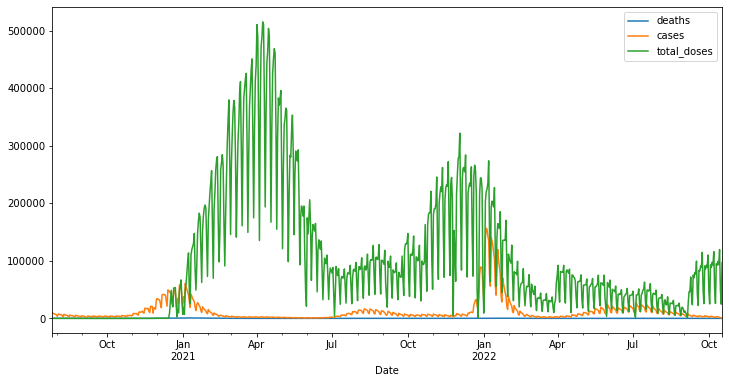

In [5]:
df.plot(figsize=(12,6))

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

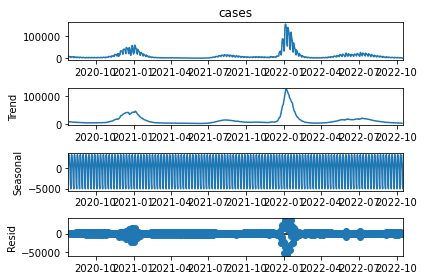

In [7]:
results = seasonal_decompose(df['cases'])
results.plot();

In [8]:
diffs = df['cases'].diff().diff()

In [9]:
diffs.dropna(inplace=True)

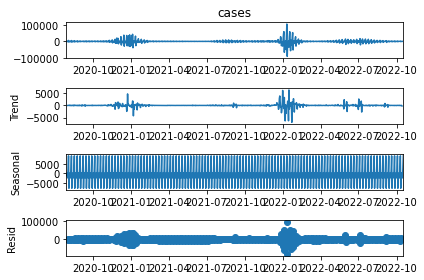

In [10]:
results = seasonal_decompose(diffs)
results.plot();

In [11]:
from statsmodels.tsa.stattools import adfuller
def ad_test(diffs):
     dftest = adfuller(diffs, autolag = 'AIC')
     print("1. ADF : ", dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:", dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

In [12]:
ad_test(diffs)

1. ADF :  -8.825153045460013
2. P-Value :  1.8320471000826822e-14
3. Num Of Lags :  19
4. Num Of Observations Used For ADF Regression: 791
5. Critical Values :
	 1% :  -3.4386441190814265
	 5% :  -2.8652008302305316
	 10% :  -2.568719369407094


In [13]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [ ]:
d=2, approximation=FALSE,trace=FALSE, xreg=xreg

In [14]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['cases'], d = 2, trace=True,
                          suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.52 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=17276.623, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=17208.614, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=17094.860, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=17055.686, Time=0.05 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=17044.540, Time=0.07 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=16890.629, Time=0.09 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=16549.231, Time=0.25 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=0.34 sec
 ARIMA(5,2,2)(0,0,0)[0]             : AIC=16334.985, Time=0.63 sec
 ARIMA(4,2,2)(0,0,0)[0]             : AIC=inf, Time=0.80 sec
 ARIMA(5,2,3)(0,0,0)[0]             : AIC=16357.350, Time=0.68 sec
 ARIMA(4,2,3)(0,0,0)[0]             : AIC=inf, Time=0.79 sec
 ARIMA(5,2,2)(0,0,0)[0] intercept   : AIC=16336.9

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  813
Model:               SARIMAX(5, 2, 2)   Log Likelihood               -8159.493
Date:                Mon, 14 Nov 2022   AIC                          16334.985
Time:                        19:22:57   BIC                          16372.572
Sample:                    07-27-2020   HQIC                         16349.415
                         - 10-17-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0544      0.010      5.263      0.000       0.034       0.075
ar.L2         -0.5304      0.010    -51.154      0.000      -0.551      -0.510
ar.L3         -0.3374      0.011    -29.836      0.000      -0.360      -0.315
ar.L4         -0.2998      0.015    -20.610      0.000      -0.328      -0.271
ar.L5         -0.5527      0.012    -44.336      0.000      -0.577      -0.528
ma.L1         -1.2134      0.014    -86.749      0.000      -1.241      -1.186
ma.L2          0.4557      0.014     32.718      0.000       0.428       0.483
sigma2      2.513e+07   8.79e-11   2.86e+17      0.000    2.51e+07    2.51e+07
===================================================================================
Ljung-Box (L1) (Q):                   6.88   Jarque-Bera (JB):             33762.57
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                            -1.26
Prob(H) (two-sided):                  0.00   Kurtosis:                        34.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.17e+32. Standard errors may be unstable.
"""

In [16]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(diffs, trace=True,
                          suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=17278.621, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=17210.586, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=17276.621, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=17097.094, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=17058.058, Time=0.06 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=17046.900, Time=0.07 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=16893.131, Time=0.10 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=16552.935, Time=0.25 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=16338.604, Time=0.56 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=16361.601, Time=0.63 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=i

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  811
Model:               SARIMAX(5, 0, 2)   Log Likelihood               -8160.301
Date:                Sun, 13 Nov 2022   AIC                          16336.603
Time:                        19:58:16   BIC                          16374.189
Sample:                    07-29-2020   HQIC                         16351.032
                         - 10-17-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0540      0.010      5.222      0.000       0.034       0.074
ar.L2         -0.5296      0.010    -51.073      0.000      -0.550      -0.509
ar.L3         -0.3375      0.011    -29.847      0.000      -0.360      -0.315
ar.L4         -0.2995      0.015    -20.574      0.000      -0.328      -0.271
ar.L5         -0.5521      0.012    -44.308      0.000      -0.577      -0.528
ma.L1         -1.2133      0.014    -86.695      0.000      -1.241      -1.186
ma.L2          0.4556      0.014     32.716      0.000       0.428       0.483
sigma2      2.513e+07   8.71e-11   2.88e+17      0.000    2.51e+07    2.51e+07
===================================================================================
Ljung-Box (L1) (Q):                   6.89   Jarque-Bera (JB):             33855.89
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                            -1.26
Prob(H) (two-sided):                  0.00   Kurtosis:                        34.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.8e+32. Standard errors may be unstable.
"""

In [15]:
from statsmodels.tsa.arima.model import ARIMA

In [16]:
print(diffs.shape)
train=diffs.iloc[:-14]
test=diffs.iloc[-14:]
print(train.shape,test.shape)

(811,)
(797,) (14,)


In [68]:
print(df['cases'].shape)
train=df['cases'].iloc[:-14]
test=df['cases'].iloc[-14:]
print(train.shape,test.shape)

(813,)
(799,) (14,)


In [69]:
#fits entire dataframe
model=ARIMA(train, order=(5,2,2))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  cases   No. Observations:                  799
Model:                 ARIMA(5, 2, 2)   Log Likelihood               -8025.542
Date:                Mon, 14 Nov 2022   AIC                          16067.084
Time:                        21:36:30   BIC                          16104.531
Sample:                    07-27-2020   HQIC                         16081.472
                         - 10-03-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0544      0.011      5.165      0.000       0.034       0.075
ar.L2         -0.5304      0.011    -50.273      0.000      -0.551      -0.510
ar.L3         -0.3373      0.012    -29.314      0.000      -0.360      -0.315
ar.L4         -0.2999      0.015    -20.262      0.000      -0.329      -0.271
ar.L5         -0.5526      0.013    -43.560      0.000      -0.577      -0.528
ma.L1         -1.2135      0.014    -85.260      0.000      -1.241      -1.186
ma.L2          0.4557      0.014     32.162      0.000       0.428       0.483
sigma2      2.557e+07   8.82e-11    2.9e+17      0.000    2.56e+07    2.56e+07
===================================================================================
Ljung-Box (L1) (Q):                   6.73   Jarque-Bera (JB):             31961.50
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               1.12   Skew:                            -1.25
Prob(H) (two-sided):                  0.34   Kurtosis:                        33.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.69e+33. Standard errors may be unstable.
"""

In [22]:
#fits training dataframe
model=ARIMA(train, order=(5,0,2))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  cases   No. Observations:                  797
Model:                 ARIMA(5, 0, 2)   Log Likelihood               -8026.365
Date:                Sun, 13 Nov 2022   AIC                          16070.731
Time:                        20:00:08   BIC                          16112.859
Sample:                    07-29-2020   HQIC                         16086.917
                         - 10-03-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7261     19.676      0.139      0.890     -35.838      41.290
ar.L1          0.0541      0.011      5.131      0.000       0.033       0.075
ar.L2         -0.5297      0.011    -48.451      0.000      -0.551      -0.508
ar.L3         -0.3374      0.012    -29.292      0.000      -0.360      -0.315
ar.L4         -0.2995      0.015    -19.766      0.000      -0.329      -0.270
ar.L5         -0.5520      0.013    -42.808      0.000      -0.577      -0.527
ma.L1         -1.2134      0.014    -84.913      0.000      -1.241      -1.185
ma.L2          0.4557      0.014     32.164      0.000       0.428       0.483
sigma2      2.557e+07   3.78e-05   6.77e+11      0.000    2.56e+07    2.56e+07
===================================================================================
Ljung-Box (L1) (Q):                   6.76   Jarque-Bera (JB):             32056.94
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               1.13   Skew:                            -1.26
Prob(H) (two-sided):                  0.33   Kurtosis:                        33.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.42e+27. Standard errors may be unstable.
"""

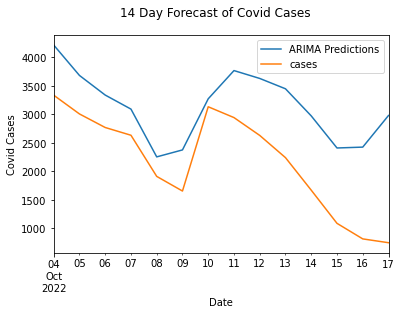

In [70]:
#Models Test forcast (14 days) and actual predictions
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test.plot(legend=True)
plt.suptitle('14 Day Forecast of Covid Cases')
plt.ylabel('Covid Cases')
plt.savefig('ARIMA(14day)Caseprediction.png')

In [71]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print(test.mean())
rmse=sqrt(mean_squared_error(pred,test))
print(rmse)

2184.785714285714
1088.6178445183095


In [72]:
from statsmodels.tsa.stattools import acf

In [73]:
from datetime import datetime

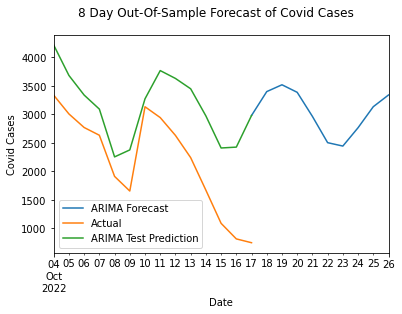

In [76]:
#Out of sample 8 Day Forecast
start_index = datetime(2022, 10, 17)
end_index = datetime(2022, 10, 26)
fore = model.predict(start=start_index, end=end_index, typ='levels').rename('ARIMA Forecast')
fore.plot(legend=True)
test.plot(legend=True, label = 'Actual')
pred.plot(legend=True, label = 'ARIMA Test Prediction')
plt.suptitle('8 Day Out-Of-Sample Forecast of Covid Cases')
plt.ylabel('Covid Cases')
plt.savefig('ARIMA(14day)oosCaseprediction.png')

In [60]:
residuals = model.resid
residuals[-14:]

Date
2022-09-20    -606.766552
2022-09-21     297.414801
2022-09-22      54.609548
2022-09-23     142.534982
2022-09-24     230.951617
2022-09-25    -544.399376
2022-09-26    1434.851817
2022-09-27    -785.907269
2022-09-28     371.236880
2022-09-29    -455.931739
2022-09-30     -17.698724
2022-10-01      71.840192
2022-10-02    -898.165888
2022-10-03    1095.701783
dtype: float64

<AxesSubplot:xlabel='Date'>

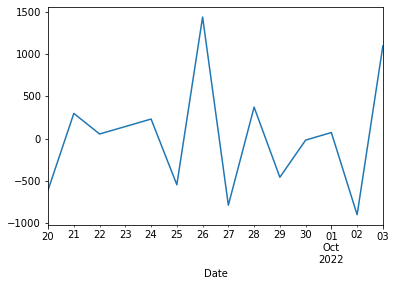

In [61]:
residuals = model.resid
residuals[-14:].plot()

<AxesSubplot:ylabel='Density'>

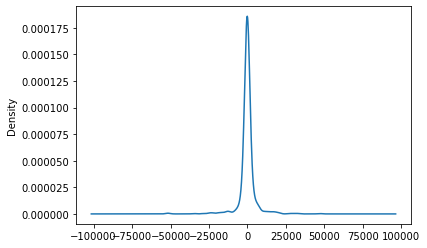

In [62]:
residuals.plot(kind='kde')

In [63]:
residuals.describe()

count      799.000000
mean       -12.978692
std       5642.358272
min     -52047.098997
25%       -767.528631
50%        -33.604781
75%        623.673146
max      46940.268356
dtype: float64

In [81]:
from sklearn import metrics
import pprint

In [79]:
print(metrics.mean_absolute_error(test, pred))
print(metrics.mean_squared_error(test, pred))
print(np.sqrt(metrics.mean_squared_error(test, pred)))

949.296422173616
1185088.8114036904
1088.6178445183095


In [84]:
mape = np.mean(np.abs(pred - test)/np.abs(test)) #mean absolute percentage error
mae = np.mean(np.abs(pred - test)) #mean absolute error
mpe = np.mean(np.abs(pred - test)/(test)) #mean percentage error
mse = metrics.mean_squared_error(test, pred) #mean squared error
rmse = np.mean((pred - test)**2)**.5 #RMSE
corr = np.corrcoef(pred, test)[0,1] #correlation coefficient

mins = np.amin(np.hstack([pred[:,None], test[:,None]]), axis =1)
maxs = np.amax(np.hstack([pred[:,None], test[:,None]]), axis =1)
minmax = 1 - np.mean(mins/maxs) #minmax

pprint.pprint({'mape':mape, 'mae':mae, 'mpe':mpe, 'mse':mse, 'rmse': rmse, 'corr':corr, 'minmax':minmax})

{'corr': 0.7818663759178305,
 'mae': 949.296422173616,
 'mape': 0.6917531927824595,
 'minmax': 0.3181266848386569,
 'mpe': 0.6917531927824595,
 'mse': 1185088.8114036904,
 'rmse': 1088.6178445183095}
